In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import signal
import h5py
import glob
import itertools
from ast import literal_eval
from scipy.interpolate import interp1d

bound_sup = 4
bound_inf = -4
threshold = np.linspace(bound_inf, bound_sup, 70)
nsigma = 1.5
index = abs(threshold-nsigma).argmin()

def bug_array_fix(df, column):
    df_out = df[column]
    df_out = df_out.str.replace('\n',',').str.replace('  ',',').str.replace('[','').str.replace(']','').str.replace(' ',',').str.split(',')
    return df_out.apply(lambda x: (np.array(x)[np.array(x)!='']).astype(np.float))

def get_roc_params(dfx,dfy, sg_eff = 0.99):
    roc_x = np.array(np.matrix(dfx.tolist()))
    roc_y = np.array(np.matrix(dfy.tolist()))
    auc = abs(np.diff(np.array(roc_x))*np.array(roc_y)[:,:-1]).sum(axis = 1)
    bg_fix = []
    for i in range(0,roc_x.shape[0]):
        x = np.array(roc_x[i,:])
        y = np.array(roc_y[i,:])
        f = interp1d(x,y,fill_value = 'extrapolate')
        bg_fix.append(f(sg_eff))
    return auc, bg_fix, roc_y[:,index]
    
df = pd.read_csv('../data/result_4.csv')

In [104]:
df.head()

,contrast,SNR,w_size,Sum_Contrast,Area,Energy real,Energy before,Energy after,filter,window,ROCx,ROCy
0,1.0,-58.244545,1.0,2539.0,561.0,40987.0,241282.768885,241282.768885,mean,1.0,[1. 1. 1. 1. 1...,[6.72826598e-04 7.37815531e-04 8.37210369e-04 ...
1,1.0,-60.702938,1.0,1683.0,677.0,19087.0,332894.139593,332894.139593,mean,1.0,[1. 1. 1. 1. 1...,[6.57826800e-04 6.92247970e-04 7.61090310e-04 ...
2,1.0,-49.872063,1.0,4110.0,925.0,64090.0,409651.064688,409651.064688,mean,1.0,[1. 1. 1. 1. 1...,[7.00561598e-04 7.96266734e-04 8.65174432e-04 ...
3,1.0,-61.916410,1.0,2123.0,703.0,20394.0,252726.224164,252726.224164,mean,1.0,[0.99857752 0.99857752 0.99857752 0.99857752 0...,[6.77016994e-04 7.76465818e-04 8.33840140e-04 ...
4,1.0,-50.698390,1.0,4106.0,942.0,58096.0,368307.059674,368307.059674,mean,1.0,[1. 1. 1. 1. 0...,[6.92950284e-04 7.69519376e-04 8.38431559e-04 ...


In [105]:
df['ROCx'] = bug_array_fix(df,'ROCx')
df['ROCy'] = bug_array_fix(df,'ROCy')
df['AUC'], df['bg_rej'], df['bg_rej_1.5'] = get_roc_params(df['ROCx'], df['ROCy'])

/home/renatel/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [106]:
index = list(range(0,100))
n_size = df.shape[0]//100
indexes = n_size*index
df['image_num'] = indexes
df.head()

,contrast,SNR,w_size,Sum_Contrast,Area,Energy real,Energy before,Energy after,filter,window,ROCx,ROCy,AUC,bg_rej,bg_rej_1.5,image_num
0,1.0,-58.244545,1.0,2539.0,561.0,40987.0,241282.768885,241282.768885,mean,1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.000672826598, 0.000737815531, 0.00083721036...",0.607674,0.06651243921880884,0.883265,0
1,1.0,-60.702938,1.0,1683.0,677.0,19087.0,332894.139593,332894.139593,mean,1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0006578268, 0.00069224797, 0.00076109031, 0...",0.645916,0.020944688033038505,0.884402,1
2,1.0,-49.872063,1.0,4110.0,925.0,64090.0,409651.064688,409651.064688,mean,1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.000700561598, 0.000796266734, 0.00086517443...",0.608737,0.049591530481249986,0.885449,2
3,1.0,-61.916410,1.0,2123.0,703.0,20394.0,252726.224164,252726.224164,mean,1.0,"[0.99857752, 0.99857752, 0.99857752, 0.9985775...","[0.000677016994, 0.000776465818, 0.00083384014...",0.642488,0.05773719149465423,0.884425,3
4,1.0,-50.698390,1.0,4106.0,942.0,58096.0,368307.059674,368307.059674,mean,1.0,"[1.0, 1.0, 1.0, 1.0, 0.99893843, 0.99893843, 0...","[0.000692950284, 0.000769519376, 0.00083843155...",0.632737,0.07321406656730556,0.885380,4


In [107]:
columns = ['image_num',
           'Sum_Contrast',
           'Area',
           'Energy real',
           'Energy before',
           'Energy after',
           'window',
           'filter',
           'SNR',
           'AUC',
           'delta_AUC',
           'delta_AUC_cumulative',
           'delta_SNR',
           'delta_SNR_cumulative',
           'bg_rej',
           'delta_bg_rej',
           'delta_bg_rej_cumulative',
           'bg_rej_1.5',
           'delta_bg_rej_1.5',
           'delta_bg_rej_1.5_cumulative',
           'ROCx',
           'ROCy']
dfObj = pd.DataFrame(columns=columns)
dfObj

,image_num,Sum_Contrast,Area,Energy real,Energy before,Energy after,window,filter,SNR,AUC,...,delta_SNR,delta_SNR_cumulative,bg_rej,delta_bg_rej,delta_bg_rej_cumulative,bg_rej_1.5,delta_bg_rej_1.5,delta_bg_rej_1.5_cumulative,ROCx,ROCy


In [110]:
values = list(df.groupby(by=['image_num','filter']))

In [112]:
for i in range(0,len(values)):
    aux = values[i][1]
    aux['delta_AUC'] = np.pad(np.diff(aux['AUC']),(1,0),'constant')
    aux['delta_AUC_cumulative'] = aux['delta_AUC'].cumsum()
    aux['delta_SNR'] = np.pad(np.diff(aux['SNR']),(1,0),'constant')
    aux['delta_SNR_cumulative'] = aux['delta_SNR'].cumsum()
    aux['delta_bg_rej'] = np.pad(np.diff(aux['bg_rej']),(1,0),'constant')
    aux['delta_bg_rej_cumulative'] = aux['delta_bg_rej'].cumsum()
    aux['delta_bg_rej_1.5'] = np.pad(np.diff(aux['bg_rej_1.5']),(1,0),'constant')
    aux['delta_bg_rej_1.5_cumulative'] = aux['delta_bg_rej_1.5'].cumsum()
    aux = aux[columns]
    frames = [dfObj,aux]
    dfObj = pd.concat(frames)    

/home/renatel/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:10053: RuntimeWarning: invalid value encountered in double_scalars
  lambda y, axis: y.cumsum(axis), "sum", 0.,
/home/renatel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


In [113]:
df = dfObj
df['Intensity mean'] = df['Sum_Contrast']/df['Area']
df.head()

,image_num,Sum_Contrast,Area,Energy real,Energy before,Energy after,window,filter,SNR,AUC,...,delta_SNR_cumulative,bg_rej,delta_bg_rej,delta_bg_rej_cumulative,bg_rej_1.5,delta_bg_rej_1.5,delta_bg_rej_1.5_cumulative,ROCx,ROCy,Intensity mean
100,0,2539.0,561.0,40987.0,241282.768885,241282.768885,1.0,gauss,-58.244545,0.607674,...,0.000000,0.06651243921880884,0,0,0.883265,0.000000,0.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.000672826598, 0.000737815531, 0.00083721036...",4.525847
300,0,2539.0,561.0,40987.0,241282.768885,51787.193812,3.0,gauss,-44.448277,0.775166,...,13.796268,0.2547726451398363,0.18826,0.18826,0.978840,0.095576,0.095576,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00169354, 0.00175852, 0.00181204, 0.0018961...",4.525847
500,0,2539.0,561.0,40987.0,241282.768885,28295.686312,5.0,gauss,-39.102234,0.870057,...,19.142311,0.45284263960962823,0.19807,0.38633,0.995053,0.016213,0.111789,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00153297, 0.00159414, 0.00165148, 0.0017164...",4.525847
0,0,2539.0,561.0,40987.0,241282.768885,241282.768885,1.0,mean,-58.244545,0.607674,...,0.000000,0.06651243921880884,0,0,0.883265,0.000000,0.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.000672826598, 0.000737815531, 0.00083721036...",4.525847
200,0,2539.0,561.0,40987.0,241282.768885,47553.044000,3.0,mean,-43.976254,0.778401,...,14.268291,0.30367689355263855,0.237164,0.237164,0.976023,0.092758,0.092758,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00191144, 0.00197643, 0.00204524, 0.0021102...",4.525847


In [114]:
## filtrando dados para visualizacao
filtro = ['mean']   ## somente filtros listados
window = [1,3,5]              ## somente nestas janelas

df_filt    = df[df.window.isin(window)]
pattern    = '|'.join(filtro)
df_filt    = df_filt[df_filt['filter'].str.contains(pattern)]
new_column = df_filt['filter']  + ', window = ' + df_filt['window'].astype('str') 
df_filt.drop(['filter','window'],axis = 1,inplace = True)
df_filt['ftype']  = new_column
df_filt.head(10)

,image_num,Sum_Contrast,Area,Energy real,Energy before,Energy after,SNR,AUC,delta_AUC,delta_AUC_cumulative,...,bg_rej,delta_bg_rej,delta_bg_rej_cumulative,bg_rej_1.5,delta_bg_rej_1.5,delta_bg_rej_1.5_cumulative,ROCx,ROCy,Intensity mean,ftype
0,0,2539.0,561.0,40987.0,241282.768885,241282.768885,-58.244545,0.607674,0.000000,0.000000,...,0.06651243921880884,0,0,0.883265,0.000000,0.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.000672826598, 0.000737815531, 0.00083721036...",4.525847,"mean, window = 1.0"
200,0,2539.0,561.0,40987.0,241282.768885,47553.044000,-43.976254,0.778401,0.170727,0.170727,...,0.30367689355263855,0.237164,0.237164,0.976023,0.092758,0.092758,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00191144, 0.00197643, 0.00204524, 0.0021102...",4.525847,"mean, window = 3.0"
400,0,2539.0,561.0,40987.0,241282.768885,24795.730401,-39.201473,0.879380,0.100979,0.271706,...,0.4661899700747738,0.162513,0.399678,0.996261,0.020238,0.112997,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00149857, 0.00154827, 0.00159796, 0.0016361...",4.525847,"mean, window = 5.0"
1,1,1683.0,677.0,19087.0,332894.139593,332894.139593,-60.702938,0.645916,0.000000,0.000000,...,0.020944688033038505,0,0,0.884402,0.000000,0.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0006578268, 0.00069224797, 0.00076109031, 0...",2.485968,"mean, window = 1.0"
201,1,1683.0,677.0,19087.0,332894.139593,44120.736529,-51.289845,0.728902,0.082986,0.082986,...,0.03458603440026271,0.0136413,0.0136413,0.976639,0.092237,0.092237,"[0.9985229, 0.9985229, 0.9985229, 0.9985229, 0...","[0.00184727, 0.00191611, 0.00200408, 0.0020805...",2.485968,"mean, window = 3.0"
401,1,1683.0,677.0,19087.0,332894.139593,19797.851812,-48.630104,0.782519,0.053617,0.136603,...,0.023058431145444074,-0.0115276,0.00211374,0.996378,0.019739,0.111976,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00157572, 0.00161015, 0.00165987, 0.0016981...",2.485968,"mean, window = 5.0"
2,2,4110.0,925.0,64090.0,409651.064688,409651.064688,-49.872063,0.608737,0.000000,0.000000,...,0.049591530481249986,0,0,0.885449,0.000000,0.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.000700561598, 0.000796266734, 0.00086517443...",4.443243,"mean, window = 1.0"
202,2,4110.0,925.0,64090.0,409651.064688,73622.805416,-35.505024,0.718408,0.109671,0.109671,...,0.0992811606250001,0.0496896,0.0496896,0.975875,0.090426,0.090426,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00186434, 0.0019677, 0.00201746, 0.00210934...",4.443243,"mean, window = 3.0"
402,2,4110.0,925.0,64090.0,409651.064688,36626.814123,-31.516027,0.764074,0.045666,0.155337,...,0.1884745540160373,0.0891934,0.138883,0.995510,0.019635,0.110061,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.00155042, 0.00158105, 0.00165761, 0.0017112...",4.443243,"mean, window = 5.0"
3,3,2123.0,703.0,20394.0,252726.224164,252726.224164,-61.916410,0.642488,0.000000,0.000000,...,0.05773719149465423,0,0,0.884425,0.000000,0.000000,"[0.99857752, 0.99857752, 0.99857752, 0.9985775...","[0.000677016994, 0.000776465818, 0.00083384014...",3.019915,"mean, window = 1.0"


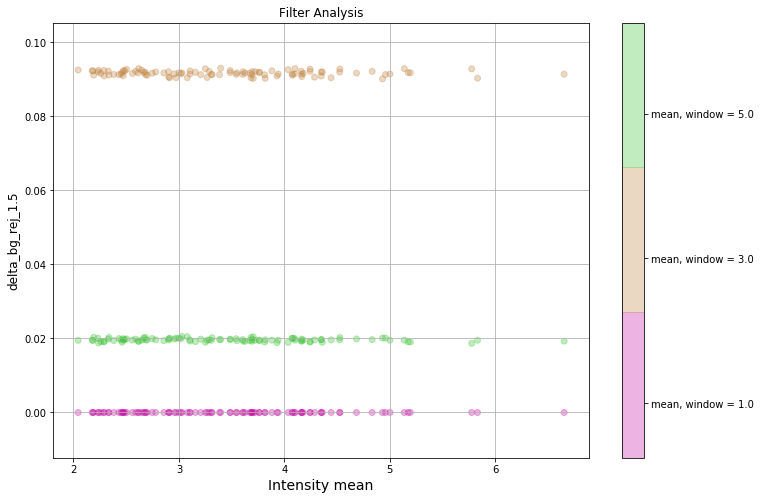

In [115]:
import matplotlib
key_analysis = ['Intensity mean','delta_bg_rej_1.5']
fig         = plt.figure(figsize=(12,8))
x           = df_filt[key_analysis[0]]
y           = df_filt[key_analysis[1]]
label_name  = df_filt.ftype

## enconding labels
from sklearn import preprocessing
le          = preprocessing.LabelEncoder()
le.fit(label_name)
label       = le.transform(label_name)

## selecionando cores para plot de forma randomica
np.random.seed(10)
colors = np.random.rand(len(np.unique(label)),3)

## scatter plots pelas cores de cada classe (w)
plt.scatter(x, y, c=label, alpha=0.3,cmap=matplotlib.colors.ListedColormap(colors))

## ajustes do plot e barra de exibicao
plt.xlabel(key_analysis[0],fontsize = 14)
plt.ylabel(key_analysis[1],fontsize = 12)
plt.title('Filter Analysis')
plt.grid()
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc+0.25)
## criando labels na colorbar
ticklabels = []
for i in np.unique(label_name):
    ticklabels.append(i)

cb.set_ticklabels(ticklabels)

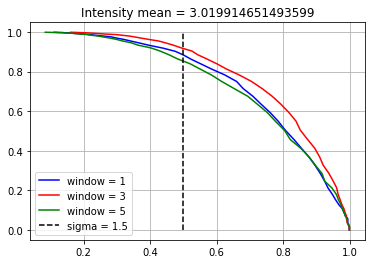

In [96]:
#df_filt[['ROCx','ROCy']]
index = abs(threshold-1.5).argmin()
plt.plot(df_filt['ROCx'][3],df_filt['ROCy'][3],'b', label = 'window = 1')
plt.plot(df_filt['ROCx'][4],df_filt['ROCy'][4],'r', label = 'window = 3')
plt.plot(df_filt['ROCx'][5],df_filt['ROCy'][5],'g', label = 'window = 5')
plt.plot(df_filt['ROCx'][3][index]*np.ones((70,)),df_filt['ROCy'][3],'--k',label = 'sigma = 1.5')
plt.grid()
plt.title('Intensity mean = ' + str(df_filt['Intensity mean'][3]))
plt.legend()

Text(0, 0.5, 'Probability density')

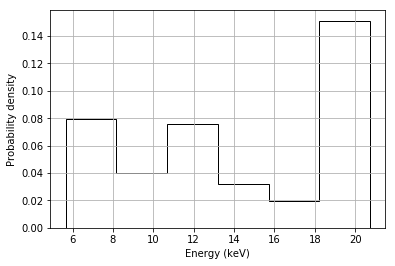

In [119]:
import seaborn as sns
sns.boxplot(df_filt['Sum_Contrast'].rename('Sum of Intensities'))

## Energy Analysis

In [31]:
## filtrando dados para visualizacao
filtro = ['mean','gauss']   ## somente filtros listados
window = [1,3,5]              ## somente nestas janelas

df_filt    = df[df.window.isin(window)]
a    = '|'.join(filtro)
df_filt    = df_filt[df_filt['filter'].str.contains(pattern)]
new_column = df_filt['filter']  + ', window = ' + df_filt['window'].astype('str') 
df_filt.drop(['filter','window'],axis = 1,inplace = True)
df_filt['ftype']  = new_column
df_filt[['image_num','Energy','Energy before','Energy after','ftype']].head()

,image_num,Energy,Energy before,Energy after,ftype
100,0,2539.0,241282.768885,241282.768885,"gauss, window = 1.0"
300,0,2539.0,241282.768885,51787.193812,"gauss, window = 3.0"
500,0,2539.0,241282.768885,28295.686312,"gauss, window = 5.0"
0,0,2539.0,241282.768885,241282.768885,"mean, window = 1.0"
200,0,2539.0,241282.768885,47553.044000,"mean, window = 3.0"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7fd6bc668>,
      dtype=object)

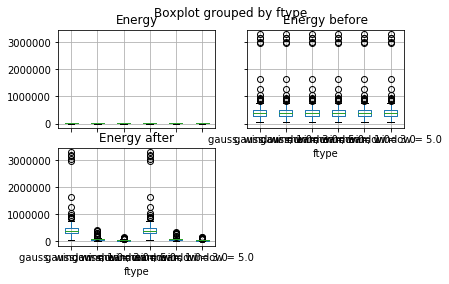

In [28]:
df_plot = df_filt[['image_num','Energy','Energy after','ftype']]
df_plot.boxplot(column=['Energy','Energy before','Energy after'], by='ftype')

In [ ]:
sns.boxplot(x="a", hue="b", y="c", data=df_long)